## Assignment 1: Test the Z test: 
(all simulated data)


Generate N samples from a distribution of your choice, **but not a Gaussian** with a chosen mean μ and standard deviation σ:   N(μ, σ) and calculate the mean of each sample (all samples should have the same size n). 

Assess the validity of the Z-test: If the samples are drawn from the distribution you are testing the z-values you calculate should follow a N(0,1) distribution (a Gaussian with mean 0 and standard deviation 1). Show that the distribution of z -statistics (find the formula in a statistics book or in last week’s slides) that you calculated (one for each sample) is indeed consistent with N(0,1).

### Grading: 
you must:

plot your original distribution

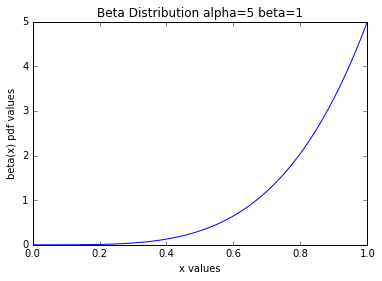

In [2]:
import matplotlib.pylab as plt
%matplotlib inline
import numpy as np
import scipy.stats

# why not
distribution = scipy.stats.beta
# 50% success rate
alpha = 5.
beta = 1.
dist_mean = (alpha / (alpha + beta))
dist_var = (alpha * beta) / (((alpha + beta)**2 ) * (1 + alpha + beta))
dist_std = np.sqrt(dist_var)

x = np.linspace(0, 1, 100)
plt.plot(x, distribution.pdf(x, alpha, beta))
plt.title("Beta Distribution alpha=5 beta=1")
plt.xlabel("x values")
plt.ylabel("beta(x) pdf values")

### Caption: Yep, looks like the beta distribution. In particular we can think of this as the likelihood of seeing different proportions coming from an underlying bernoulli distribution where we've seen 5 success and 1 failure, 6 trials total

plot at least one of the samples

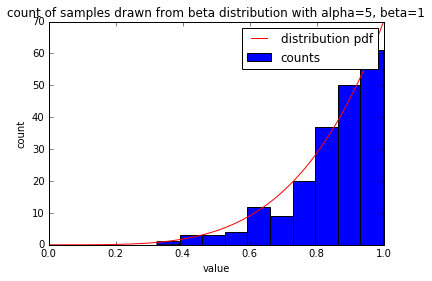

In [3]:
np.random.seed(42)
n_samples = 123
sample_size = 200
samples = distribution.rvs(alpha, beta, size=(n_samples, sample_size), random_state=42)
plt.hist(samples[0], label='counts')
plt.plot(x, 14 * distribution.pdf(x, alpha, beta), 'r-', label='distribution pdf')
plt.legend()
plt.xlabel("value")
plt.ylabel("count")
plt.title("count of samples drawn from beta distribution with alpha=5, beta=1")

### Caption: yep, looks like these samples came from a bernoulli distribution by the storied "plot the distribution over the histogram" test

plot the distribution of z statistics

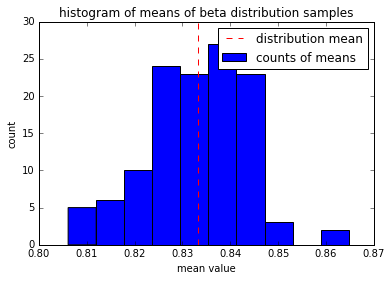

In [5]:
means = np.mean(samples, axis=1)
assert len(means) == n_samples # this is how i figure out which axis to use lol
plt.hist(means, label='counts of means')
plt.axvline(dist_mean, color='r', linestyle='--', label='distribution mean')
plt.legend()
plt.title("histogram of means of beta distribution samples")
plt.xlabel("mean value")
plt.ylabel("count")

### Caption: yep, looks normal

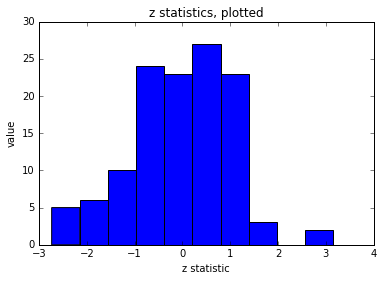

In [6]:
z_stats = (means - dist_mean) / (dist_std / np.sqrt(sample_size))
plt.hist(z_stats)
plt.title("z statistics, plotted")
plt.xlabel("z statistic")
plt.ylabel("value")

### Caption: yep, looks normal drawn from N(0, 1). Notably this is just scaling the above values so the histograms look identical

fit the z-statistics with a gaussian model and assess the goodness of fit with a simple test (AD or KS).

sample mean: -0.0423030733259
sample std: 1.06733019208
pretttty close!


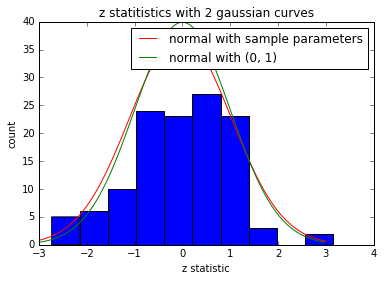

In [9]:
zm = z_stats.mean()
zstd = z_stats.std(ddof=1)
print "sample mean: {}".format(zm)
print "sample std: {}".format(zstd)
print "pretttty close!"
plt.hist(z_stats)
# i know you can yscale better, see HW2 where i did it for completeness' sake
x = np.linspace(-3, 3, 100)
plt.plot(x, 100 *scipy.stats.norm.pdf(x, zm, zstd), 'r-', label='normal with sample parameters')
plt.plot(x, 100 * scipy.stats.norm.pdf(x, 0, 1), 'g-', label='normal with (0, 1)')
plt.legend()
plt.xlabel("z statistic")
plt.ylabel("count")
plt.title("z statitistics with 2 gaussian curves")

### Caption: there are many ways to <s>slice a banana</s> - er, I mean, fit a distribution - so I showed both N(0, 1) and the most immediate way I could think of to fit a normal here.

In [12]:
np.random.seed(42)
normal_samples = np.random.normal(size=1000)
fitted_samples = np.random.normal(size=1000, loc=zm, scale=zstd)
print "KS on fitted normal: {}".format(scipy.stats.ks_2samp(z_stats, fitted_samples))
print "KS on N(0, 1): {}".format(scipy.stats.ks_2samp(z_stats, normal_samples))
print "Thus, with a p-value significantly > .05, we don't reject the null hypothesis that this came from N(0, 1)"

KS on fitted normal: Ks_2sampResult(statistic=0.062219512195121895, pvalue=0.77749637241613556)
KS on N(0, 1): Ks_2sampResult(statistic=0.052243902439024437, pvalue=0.91917575339001545)
Thus, with a p-value significantly > .05, we don't reject the null hypothesis that this came from N(0, 1)


find the best fit values for the model parameters (mean and standard deviation) by minimizing the model chi square.

plots need have caption, axis labels, etx and comment your figures and test results appropriately (to demonstrate your understanding).